# Pixel classification using Scikit image
Pixel classification is a technique for assigning pixels to multiple classes. If there are two classes (object and background), we are talking about binarization. In this example we use a [random forest classifier](https://en.wikipedia.org/wiki/Random_forest) for pixel classification.

See also
* [Scikit-image random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Classification of land cover by Chris Holden](https://ceholden.github.io/open-geo-tutorial/python/chapter_5_classification.html)


In [ ]:
# !pip install scikit-image
# !pip install matplotlib
# !pip install nd2
# !pip install -U scikit-learn

In [2]:
from skimage.io import imread, imshow,imsave
import nd2
import numpy as np
import napari
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:
WT = imread('competition_2_WTmScarlet_dwspFmNeonGreen/TW_growth/denoised/WT_C2-MAX_20230424_5hpif_mix2_WTmScarlet_dwspFmNeonGreen_ours_R3_003-1.tif')

(1200, 1200)

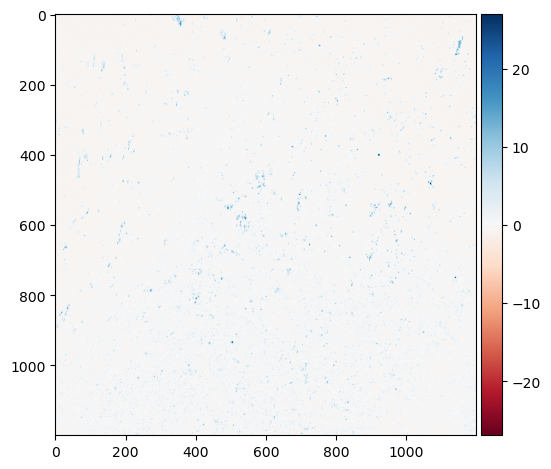

In [4]:
imshow(WT)
WT.shape

In [5]:
from skimage import filters

def generate_feature_stack(image):
    # determine features
    blurred = filters.gaussian(image, sigma=2)
    edges = filters.sobel(blurred)

    # collect features in a stack
    # The ravel() function turns a nD image into a 1-D image.
    # We need to use it because scikit-learn expects values in a 1-D format here.
    feature_stack = [
        image.ravel(),
        blurred.ravel(),
        edges.ravel()
    ]

    # return stack as numpy-array
    return np.asarray(feature_stack)

def format_data(feature_stack, annotation):
    # reformat the data to match what scikit-learn expects
    # transpose the feature stack
    X = feature_stack.T
    # make the annotation 1-dimensional
    y = annotation.ravel()

    # remove all pixels from the feature and annotations which have not been annotated
    mask = y > 0
    X = X[mask]
    y = y[mask]

    return X, y

# Use napari for visualization

In [6]:
%gui qt
# start napari
viewer = napari.Viewer()
viewer.add_image(WT)

<Image layer 'WT' at 0x7f4cbba67c10>

# Now load the classifier to make predictions

In [7]:
feature_stack = generate_feature_stack(WT)

In [9]:
filename = '../models/RandomForestClassifier_transwell/transwell_denoised_2_categories.pkl'

In [10]:

# load a classifier if there is one
loaded_classifier = pickle.load(open(filename, 'rb'))

In [12]:
# process the whole image and show result
result_1d = loaded_classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0
result_2d = result_1d.reshape(WT.shape)
result_2d = result_2d + 1
result_2d[result_2d ==1]=0
viewer.add_labels(result_2d)


<Labels layer 'result_2d' at 0x7f4c7405b3a0>

In [13]:
result_2d.min()

0

# check in napari if it looks good

In [14]:
# save results
fn_saving = "WT_3-1-predictions_transwell_denoised.tif"
# result_2d[result_2d>0] = 1
imsave(fn_saving, result_2d)

/tmp/ipykernel_26661/1170266940.py:4: UserWarning: WT_3-1-predictions_transwell_denoised.tif is a low contrast image
  imsave(fn_saving, result_2d)


# or another example

In [58]:
img = imread('competition_2_WTmScarlet_dwspFmNeonGreen/TW_growth/denoised/dwspF_C1-MAX_20230424_5hpif_mix2_WTmScarlet_dwspFmNeonGreen_ours_R3_003-1.tif')
viewer.add_image(img)

feature_stack = generate_feature_stack(img)


# predict for the whole image
# output is [0,1]

result_1d = loaded_classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0
result_2d = result_1d.reshape(img.shape)

# show results in a way that label = 2 and background = 0
img_pred = result_2d+1
img_pred[img_pred==1]=0
viewer.add_labels(img_pred)


<Labels layer 'img_pred [9]' at 0x7f4c45b1aa00>

In [20]:
# if happy with results
imsave('predictions_WT_denoised.tif',result_2d)

/tmp/ipykernel_49454/3088582772.py:2: UserWarning: predictions_WT_denoised.tif is a low contrast image
  imsave('predictions_WT_denoised.tif',result_2d)


In [45]:
intensity_img =  imread('competition_2_WTmScarlet_dwspFmNeonGreen/TW_growth/dwspF_C1-MAX_20230424_5hpif_mix2_WTmScarlet_dwspFmNeonGreen_ours_R3_003-1.tif')


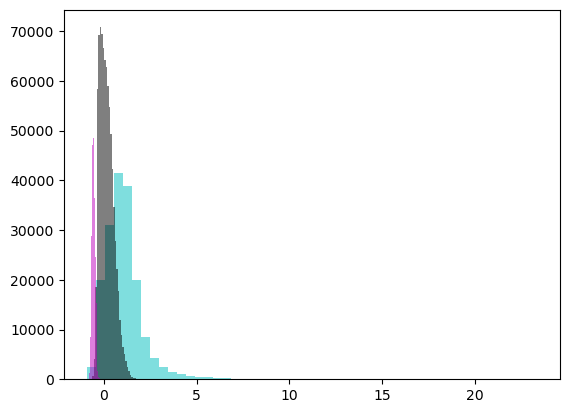

In [59]:
import matplotlib.pyplot as plt
hist1 = plt.hist(img[result_2d==1],50,alpha=0.5,color='c')
hist2 = plt.hist(img[result_2d==2],50,alpha=0.5,color='k')
hist2 = plt.hist(img[result_2d==0],50,alpha=0.5,color='m')
# plt.ylim(0,40000)
# plt.xlim(-5,10)

In [54]:
intensity_img = imread('competition_2_WTmScarlet_dwspFmNeonGreen/TW_growth/WT_C2-MAX_20230424_5hpif_mix2_WTmScarlet_dwspFmNeonGreen_ours_R3_003-1.tif')


In [60]:
img = imread('competition_2_WTmScarlet_dwspFmNeonGreen/TW_growth/denoised/WT_C2-MAX_20230424_5hpif_mix2_WTmScarlet_dwspFmNeonGreen_ours_R3_003-1.tif')
viewer.add_image(img)
feature_stack = generate_feature_stack(img)
result_1d = loaded_classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0
result_2d = result_1d.reshape(img.shape)

# show results in a way that label = 2 and background = 0
img_pred = result_2d+1
img_pred[img_pred==1]=0
viewer.add_labels(img_pred)

<Labels layer 'img_pred [10]' at 0x7f4c60e5e400>

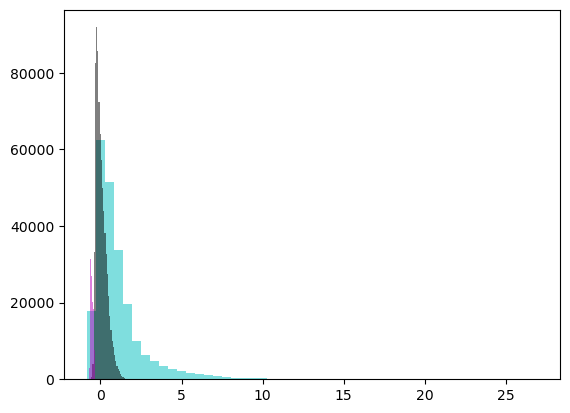

In [62]:
import matplotlib.pyplot as plt
hist1 = plt.hist(img[result_2d==1],50,alpha=0.5,color='c')
hist2 = plt.hist(img[result_2d==2],50,alpha=0.5,color='k')
hist2 = plt.hist(img[result_2d==0],50,alpha=0.5,color='m')
# plt.ylim(0,40000)
# plt.xlim(-5,10)